#**KNN**
APPLYING KNN WITH K=5 ON THE FEATURES DIRECTLY

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.flatten()
y_test = y_test.flatten()

# Flatten images (32x32x3 to 3072)
x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

# Normalize the data
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_test_flat = scaler.transform(x_test_flat)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_flat, y_train)

# Predict and evaluate
y_pred = knn.predict(x_test_flat)

# Classification report
print(classification_report(y_test, y_pred))


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
              precision    recall  f1-score   support

           0       0.38      0.54      0.45      1000
           1       0.67      0.21      0.32      1000
           2       0.22      0.44      0.29      1000
           3       0.30      0.23      0.26      1000
           4       0.25      0.52      0.33      1000
           5       0.39      0.22      0.28      1000
           6       0.36      0.26      0.30      1000
           7       0.69      0.22      0.33      1000
           8       0.40      0.66      0.50      1000
           9       0.73      0.13      0.23      1000

    accuracy                           0.34     10000
   macro avg       0.44      0.34      0.33     10000
weighted avg       0.44      0.34      0.33     10000



# **KNN**
FINDING OPTIMAL K FOR KNN USING CNN FEATURES

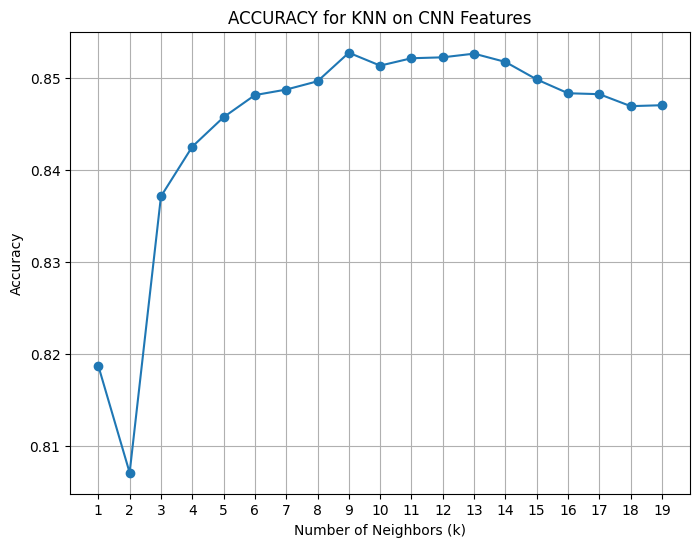

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load CNN features for training and testing
x_train_cnn = np.load('/content/drive/MyDrive/features_prml/cnn_train.npy')
x_test_cnn = np.load('/content/drive/MyDrive/features_prml/cnn_test.npy')

# Load corresponding labels
y_train = (np.load('/content/drive/MyDrive/features_prml/y_train.npy')).flatten()
y_test = (np.load('/content/drive/MyDrive/features_prml/y_test.npy')).flatten()


# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
x_train_cnn = scaler.fit_transform(x_train_cnn)   # Fit on train, transform train
x_test_cnn = scaler.transform(x_test_cnn)         # Use same transform on test


# Try different values of k (number of neighbors)
k_values = range(1, 20)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_cnn, y_train)                 # Train the model
    y_pred = knn.predict(x_test_cnn)              # Predict on test data
    acc = accuracy_score(y_test, y_pred)          # Calculate accuracy
    accuracies.append(acc)


# Plot the accuracy vs k to find the optimal number of neighbors
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('ACCURACY for KNN on CNN Features')  # Corrected title
plt.grid(True)
plt.xticks(k_values)
plt.show()

=> OPTIMAL K=9

# **KNN + HOG**

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load HoG features
x_train_hog = np.load('/content/drive/MyDrive/features_prml/hog_train.npy')
x_test_hog = np.load('/content/drive/MyDrive/features_prml/hog_test.npy')


# Normalize the data
scaler = StandardScaler()
x_train_hog = scaler.fit_transform(x_train_hog)
x_test_hog = scaler.transform(x_test_hog)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_hog, y_train)

# Predict and evaluate
y_pred = knn.predict(x_test_hog)

# Classification report
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.75      0.53      0.62      1000
           1       0.71      0.75      0.73      1000
           2       0.52      0.39      0.44      1000
           3       0.44      0.16      0.23      1000
           4       0.32      0.65      0.43      1000
           5       0.50      0.26      0.35      1000
           6       0.39      0.83      0.53      1000
           7       0.75      0.50      0.60      1000
           8       0.69      0.60      0.64      1000
           9       0.70      0.62      0.66      1000

    accuracy                           0.53     10000
   macro avg       0.58      0.53      0.52     10000
weighted avg       0.58      0.53      0.52     10000



# **KNN + CNN**

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load HoG features
x_train_hog = np.load('/content/drive/MyDrive/features_prml/cnn_train.npy')
x_test_hog = np.load('/content/drive/MyDrive/features_prml/cnn_test.npy')


# Normalize the data
scaler = StandardScaler()
x_train_hog = scaler.fit_transform(x_train_hog)
x_test_hog = scaler.transform(x_test_hog)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train_hog, y_train)

# Predict and evaluate
y_pred = knn.predict(x_test_hog)

# Classification report
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1000
           1       0.89      0.93      0.91      1000
           2       0.91      0.74      0.82      1000
           3       0.72      0.78      0.75      1000
           4       0.76      0.84      0.80      1000
           5       0.90      0.77      0.83      1000
           6       0.81      0.90      0.86      1000
           7       0.91      0.84      0.87      1000
           8       0.90      0.95      0.92      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

